In [1]:
import numpy as np
from scipy import integrate, optimize
from scipy.special import jv, hermite

# Определение функции F(a)
def F(a):
    def integrand(x):
        return jv(0, a*x) * hermite(5)(x/a)
    integral, error = integrate.quad(integrand, 1, 2)
    return integral

# Нахождение минимального значения функции F(a) на отрезке [2, 3]
result = optimize.minimize_scalar(F, bounds=(2, 3), method='bounded')
print(f"Минимальное значение функции F(a) на отрезке [2, 3] равно {result.fun} при a = {result.x}")

Минимальное значение функции F(a) на отрезке [2, 3] равно -11.519620351290778 при a = 2.6096045110506236


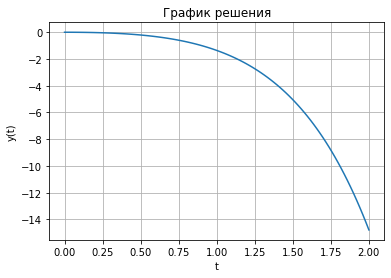

In [3]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

# Определение системы уравнений
def system(t, y):
    return [y[1], y[2], 3*y[2] - 3*y[1] + y[0]]

# Начальные условия
y0 = [0, 0, -1]

# Решение системы уравнений
sol = solve_ivp(system, [0, 2], y0, t_eval=np.linspace(0, 2, 100))

# Построение графика решения
plt.plot(sol.t, sol.y[0])
plt.xlabel('t')
plt.ylabel('y(t)')
plt.title('График решения')
plt.grid(True)
plt.show()


In [1]:
import numpy as np
import scipy.linalg
import scipy.sparse.linalg
import time

# Создаем трехдиагональную матрицу
n = 10000
main_diag = np.random.rand(n)
lower_diag = np.random.rand(n-1)
upper_diag = np.random.rand(n-1)
A = np.diag(main_diag) + np.diag(lower_diag, -1) + np.diag(upper_diag, 1)

# Создаем вектор правой части
b = np.random.rand(n)

# Преобразуем матрицу для использования в solve_banded
ab = np.zeros((3, n))
ab[0, 1:] = upper_diag
ab[1, :] = main_diag
ab[2, :-1] = lower_diag

# Решаем с помощью solve_banded
start = time.time()
x_banded = scipy.linalg.solve_banded((1, 1), ab, b)
end = time.time()
print(f"Время решения с помощью solve_banded: {end - start} секунд")

# Преобразуем матрицу для использования в lgmres
A_sparse = scipy.sparse.diags([lower_diag, main_diag, upper_diag], [-1, 0, 1])

# Решаем с помощью lgmres
start = time.time()
x_lgmres, info = scipy.sparse.linalg.lgmres(A_sparse, b)
end = time.time()
print(f"Время решения с помощью lgmres: {end - start} секунд")


Время решения с помощью solve_banded: 0.007460355758666992 секунд


/tmp/ipykernel_48765/2384502881.py:33: DeprecationWarning: scipy.sparse.linalg.lgmres called without specifying `atol`. The default value will change in the future. To preserve current behavior, set ``atol=tol``.
  x_lgmres, info = scipy.sparse.linalg.lgmres(A_sparse, b)


Время решения с помощью lgmres: 8.587770223617554 секунд
